In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv('owid-covid-data.csv', delimiter=',')

In [68]:
pd.set_option('display.max_columns', None)

In [69]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [11]:
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
new_tests                          float64
total_tests                        float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

In [13]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [14]:
df.dtypes

iso_code                                   object
continent                                  object
location                                   object
date                               datetime64[ns]
total_cases                               float64
new_cases                                 float64
total_deaths                              float64
new_deaths                                float64
total_cases_per_million                   float64
new_cases_per_million                     float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
new_tests                                 float64
total_tests                               float64
total_tests_per_thousand                  float64
new_tests_per_thousand                    float64
new_tests_smoothed                        float64
new_tests_smoothed_per_thousand           float64
tests_units                                object
stringency_index                          float64


In [15]:
df.isnull().sum()

iso_code                              64
continent                            276
location                               0
date                                   0
total_cases                          355
new_cases                            355
total_deaths                         355
new_deaths                           355
total_cases_per_million              419
new_cases_per_million                419
total_deaths_per_million             419
new_deaths_per_million               419
new_tests                          23016
total_tests                        22770
total_tests_per_thousand           22770
new_tests_per_thousand             23016
new_tests_smoothed                 21897
new_tests_smoothed_per_thousand    21897
tests_units                        21129
stringency_index                    6287
population                            64
population_density                  1507
median_age                          3343
aged_65_older                       3779
aged_70_older   

In [21]:
df = df[df['iso_code'].notna()]
df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33348,OWID_WRL,NaN,World,2020-07-25,15765612.0,284710.0,639497.0,6364.0,2022.581,36.526,...,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58
33349,OWID_WRL,NaN,World,2020-07-26,16023656.0,258044.0,645249.0,5752.0,2055.686,33.105,...,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58
33350,OWID_WRL,NaN,World,2020-07-27,16256097.0,232441.0,649219.0,3970.0,2085.506,29.820,...,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58
33351,OWID_WRL,NaN,World,2020-07-28,16468164.0,212067.0,653880.0,4661.0,2112.712,27.206,...,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58


In [70]:
ZAF = df[df['iso_code'] =='ZAF']
ZAF = pd.DataFrame(ZAF)
ZAF

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
27533,ZAF,Africa,South Africa,2020-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,0.001,NaN,NaN,NaN,people tested,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13
27534,ZAF,Africa,South Africa,2020-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13
27535,ZAF,Africa,South Africa,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13
27536,ZAF,Africa,South Africa,2020-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13
27537,ZAF,Africa,South Africa,2020-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,0.001,NaN,NaN,NaN,people tested,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27702,ZAF,Africa,South Africa,2020-07-25,421996.0,13944.0,6343.0,250.0,7115.247,235.109,106.949,4.215,46324.0,2730812.0,46.044,0.781,44010.0,0.742,people tested,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13
27703,ZAF,Africa,South Africa,2020-07-26,434200.0,12204.0,6655.0,312.0,7321.018,205.771,112.210,5.261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13
27704,ZAF,Africa,South Africa,2020-07-27,445433.0,11233.0,6769.0,114.0,7510.417,189.399,114.132,1.922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13
27705,ZAF,Africa,South Africa,2020-07-28,452529.0,7096.0,7067.0,298.0,7630.062,119.645,119.156,5.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13


In [44]:
KOR = df[df['iso_code'] =='KOR']
KOR = pd.DataFrame(KOR)
KOR

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
27707,KOR,Asia,South Korea,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,...,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03
27708,KOR,Asia,South Korea,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,...,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03
27709,KOR,Asia,South Korea,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,...,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03
27710,KOR,Asia,South Korea,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,...,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03
27711,KOR,Asia,South Korea,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,...,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27914,KOR,Asia,South Korea,2020-07-25,14092.0,113.0,298.0,0.0,274.863,2.204,...,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03
27915,KOR,Asia,South Korea,2020-07-26,14150.0,58.0,298.0,0.0,275.994,1.131,...,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03
27916,KOR,Asia,South Korea,2020-07-27,14175.0,25.0,299.0,1.0,276.482,0.488,...,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03
27917,KOR,Asia,South Korea,2020-07-28,14203.0,28.0,300.0,1.0,277.028,0.546,...,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03


In [88]:
USA = df[df['iso_code'] =='USA']
USA = pd.DataFrame(USA)
USA

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
31574,USA,North America,United States,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
31575,USA,North America,United States,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
31576,USA,North America,United States,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
31577,USA,North America,United States,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
31578,USA,North America,United States,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31781,USA,North America,United States,2020-07-25,4112529.0,78427.0,145546.0,1304.0,12424.460,236.938,439.712,3.940,797589.0,50635683.0,152.977,2.41,801014.0,2.42,units unclear (incl. non-PCR),NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
31782,USA,North America,United States,2020-07-26,4178027.0,65498.0,146460.0,914.0,12622.337,197.878,442.474,2.761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
31783,USA,North America,United States,2020-07-27,4234020.0,55993.0,146935.0,475.0,12791.499,169.162,443.909,1.435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
31784,USA,North America,United States,2020-07-28,4290263.0,56243.0,148011.0,1076.0,12961.416,169.917,447.160,3.251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86


In [73]:
NZL = df[df['iso_code'] =='NZL']
NZL = pd.DataFrame(NZL)
NZL

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
21820,NZL,Oceania,New Zealand,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29
21821,NZL,Oceania,New Zealand,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29
21822,NZL,Oceania,New Zealand,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29
21823,NZL,Oceania,New Zealand,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29
21824,NZL,Oceania,New Zealand,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22025,NZL,Oceania,New Zealand,2020-07-25,1206.0,0.0,22.0,0.0,250.092,0.000,4.562,0.0,1754.0,455677.0,94.495,0.364,1884.0,0.391,tests performed,NaN,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29
22026,NZL,Oceania,New Zealand,2020-07-26,1206.0,0.0,22.0,0.0,250.092,0.000,4.562,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29
22027,NZL,Oceania,New Zealand,2020-07-27,1206.0,0.0,22.0,0.0,250.092,0.000,4.562,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29
22028,NZL,Oceania,New Zealand,2020-07-28,1207.0,1.0,22.0,0.0,250.299,0.207,4.562,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29


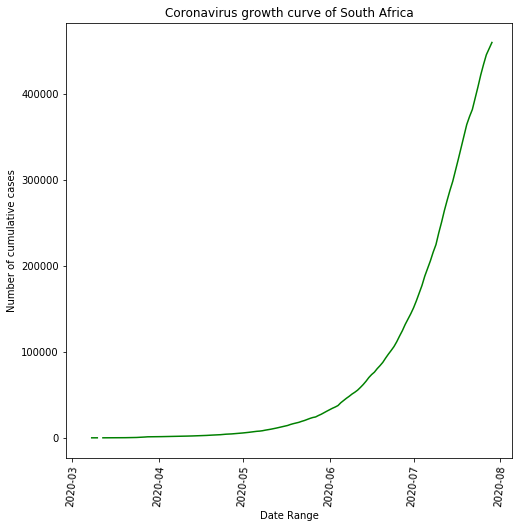

In [109]:
plt.figure(figsize=(8,8))
plt.plot(ZAF['date'], ZAF['total_cases'], color='green')
plt.xlabel("Date Range"); plt.ylabel("Number of cumulative cases"); plt.title("Coronavirus growth curve of South Africa");
plt.xticks(rotation = 85,fontsize = 10);

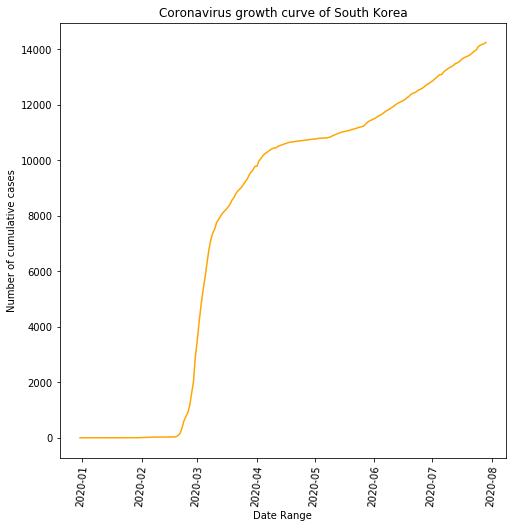

In [108]:
plt.figure(figsize=(8,8))
plt.plot(KOR['date'], KOR['total_cases'], color='orange')
plt.xlabel("Date Range"); plt.ylabel("Number of cumulative cases"); plt.title("Coronavirus growth curve of South Korea");
plt.xticks(rotation = 85,fontsize = 10);

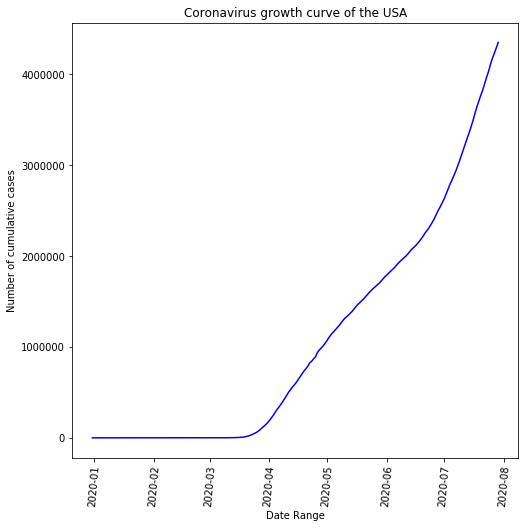

In [106]:
plt.figure(figsize=(8,8))
plt.plot(USA['date'], USA['total_cases'],color='blue')
plt.xlabel("Date Range"); plt.ylabel("Number of cumulative cases"); plt.title("Coronavirus growth curve of the USA");
plt.xticks(rotation = 85,fontsize = 10);

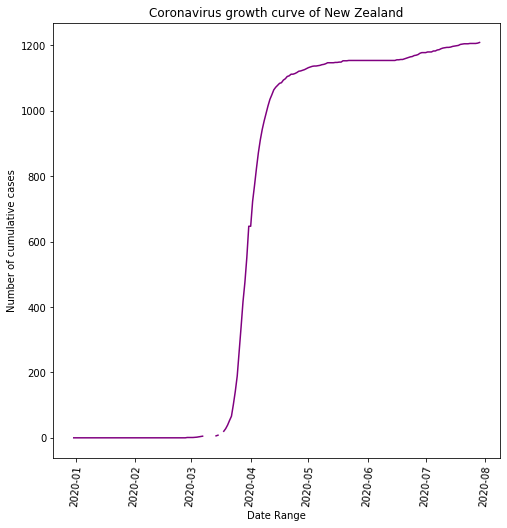

In [110]:
plt.figure(figsize=(8,8))
plt.plot(NZL['date'], NZL['total_cases'],color='purple')
plt.xlabel("Date Range"); plt.ylabel("Number of cumulative cases"); plt.title("Coronavirus growth curve of New Zealand");
plt.xticks(rotation = 85,fontsize = 10);

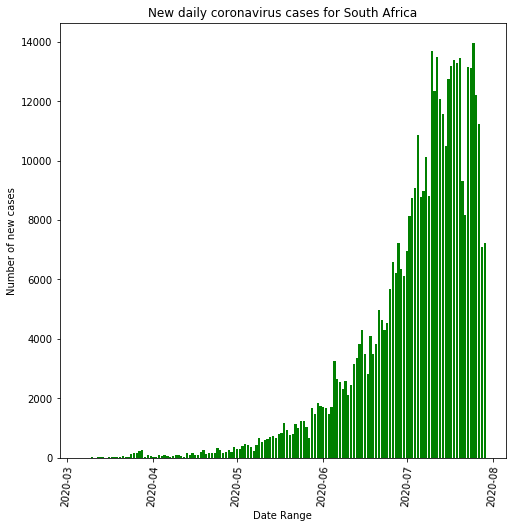

In [112]:
plt.figure(figsize=(8,8))
plt.bar(ZAF['date'], ZAF['new_cases'], color='green')
plt.xlabel("Date Range"); plt.ylabel("Number of new cases"); plt.title("New daily coronavirus cases for South Africa");
plt.xticks(rotation = 85,fontsize = 10);

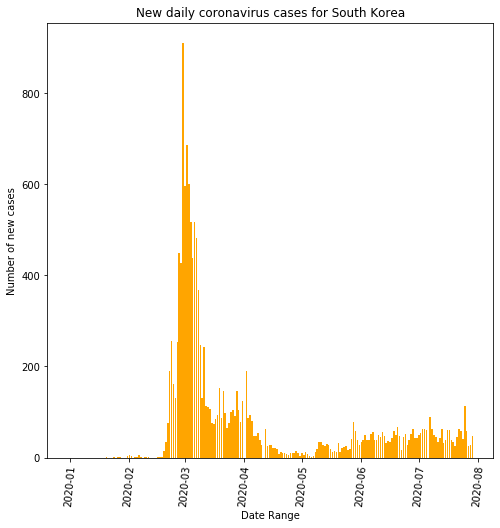

In [113]:
plt.figure(figsize=(8,8))
plt.bar(KOR['date'], KOR['new_cases'], color='orange')
plt.xlabel("Date Range"); plt.ylabel("Number of new cases"); plt.title("New daily coronavirus cases for South Korea")
plt.xticks(rotation = 85,fontsize = 10);

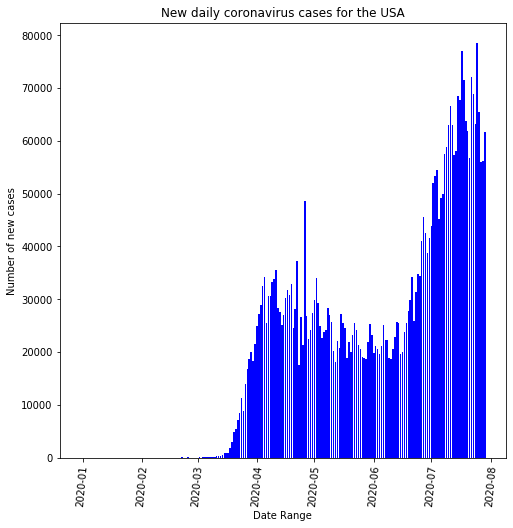

In [115]:
plt.figure(figsize=(8,8))
plt.bar(USA['date'], USA['new_cases'],color='blue')
plt.xlabel("Date Range"); plt.ylabel("Number of new cases"); plt.title("New daily coronavirus cases for the USA")
plt.xticks(rotation = 85,fontsize = 10);

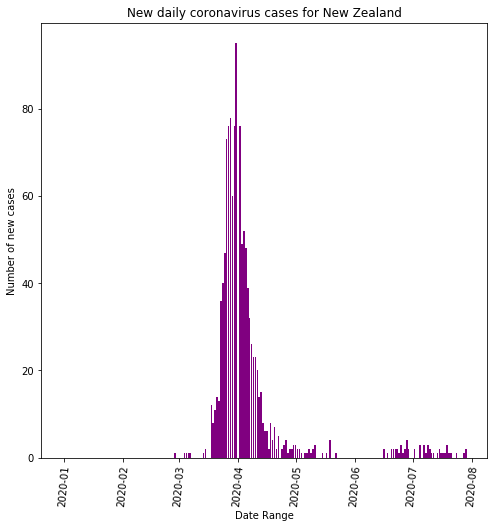

In [116]:
plt.figure(figsize=(8,8))
plt.bar(NZL['date'], NZL['new_cases'],color='purple')
plt.xlabel("Date Range"); plt.ylabel("Number of new cases"); plt.title("New daily coronavirus cases for New Zealand")
plt.xticks(rotation = 85,fontsize = 10);

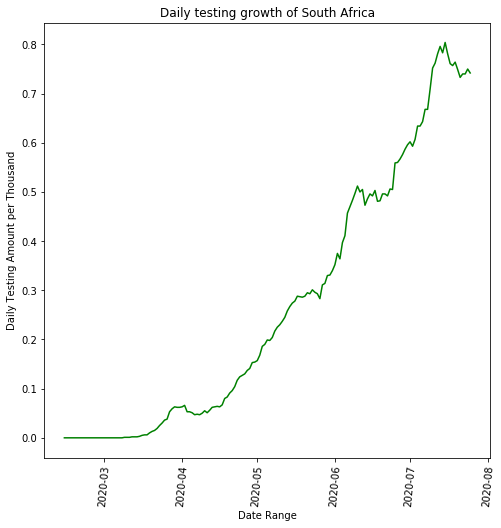

In [117]:
plt.figure(figsize=(8,8))
plt.plot(ZAF['date'], ZAF['new_tests_smoothed_per_thousand'], color='green')
plt.xlabel("Date Range"); plt.ylabel("Daily Testing Amount per Thousand"); plt.title("Daily testing growth of South Africa")
plt.xticks(rotation = 85,fontsize = 10);

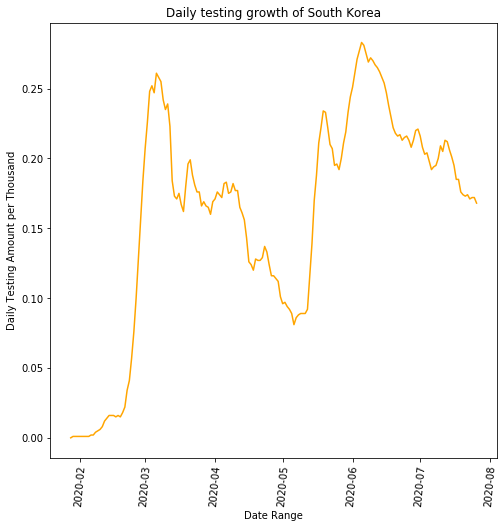

In [118]:
plt.figure(figsize=(8,8))
plt.plot(KOR['date'], KOR['new_tests_smoothed_per_thousand'], color='orange')
plt.xlabel("Date Range"); plt.ylabel("Daily Testing Amount per Thousand"); plt.title("Daily testing growth of South Korea")
plt.xticks(rotation = 85,fontsize = 10);

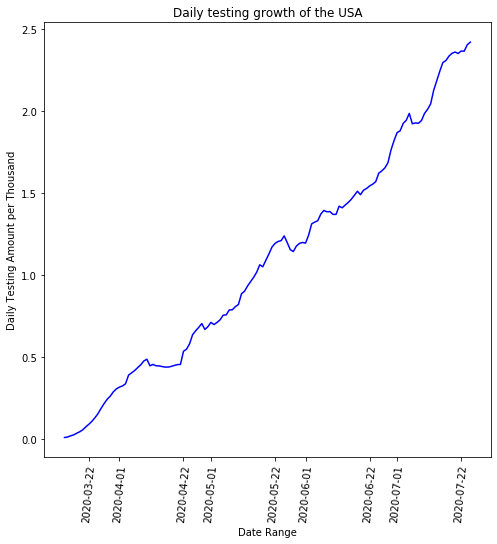

In [121]:
plt.figure(figsize=(8,8))
plt.plot(USA['date'], USA['new_tests_smoothed_per_thousand'], color='blue')
plt.xlabel("Date Range"); plt.ylabel("Daily Testing Amount per Thousand"); plt.title("Daily testing growth of the USA")
plt.xticks(rotation = 85,fontsize = 10);

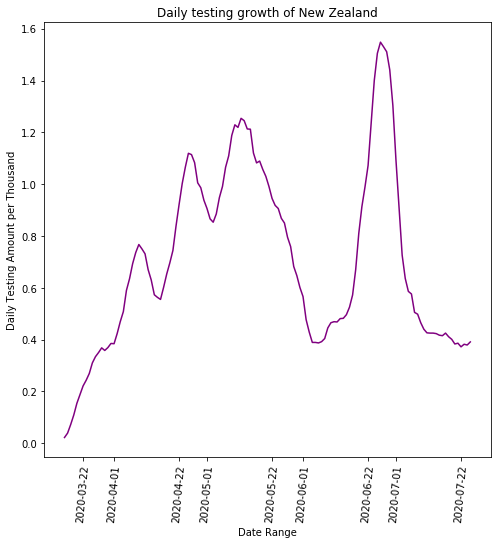

In [122]:
plt.figure(figsize=(8,8))
plt.plot(NZL['date'], NZL['new_tests_smoothed_per_thousand'], color='purple')
plt.xlabel("Date Range"); plt.ylabel("Daily Testing Amount per Thousand"); plt.title("Daily testing growth of New Zealand")
plt.xticks(rotation = 85,fontsize = 10);